In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_dataset = train_datagen.flow_from_directory('Face Mask Dataset/Train',target_size=(150, 150), color_mode='rgb', batch_size=10, class_mode='binary', shuffle=True)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
    
test_dataset = test_datagen.flow_from_directory(
    'Face Mask Dataset/Test',
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=True)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout, Conv2D, Activation, MaxPooling2D
model = Sequential() 
model.add(Conv2D(64, (2, 2), input_shape=(150, 150, 3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 64)      832       
                                                                 
 activation (Activation)     (None, 149, 149, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        8224      
                                                                 
 activation_1 (Activation)   (None, 73, 73, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_dataset, epochs = 14, validation_data = test_dataset, batch_size=32)

Epoch 1/14
1000/1000 [==============================] - 63s 56ms/step - loss: 0.3215 - accuracy: 0.8779 - val_loss: 0.2406 - val_accuracy: 0.9002
Epoch 2/14
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2374 - accuracy: 0.9131 - val_loss: 0.2233 - val_accuracy: 0.9294
Epoch 3/14
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2253 - accuracy: 0.9193 - val_loss: 0.2281 - val_accuracy: 0.9274
Epoch 4/14
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2269 - accuracy: 0.9204 - val_loss: 0.2137 - val_accuracy: 0.9325
Epoch 5/14
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2032 - accuracy: 0.9287 - val_loss: 0.2285 - val_accuracy: 0.9083
Epoch 6/14
1000/1000 [==============================] - 56s 56ms/step - loss: 0.2041 - accuracy: 0.9291 - val_loss: 0.2411 - val_accuracy: 0.9204
Epoch 7/14
1000/1000 [==============================] - 53s 53ms/step - loss: 0.1969 - accuracy: 0.9263 - val_loss: 0.2147 -

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


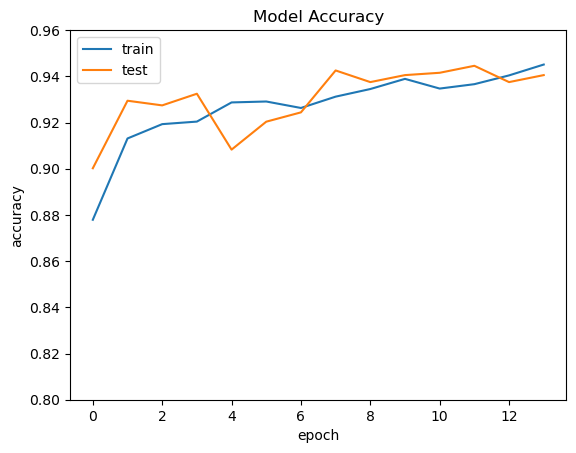

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylim([0.8, 0.96])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

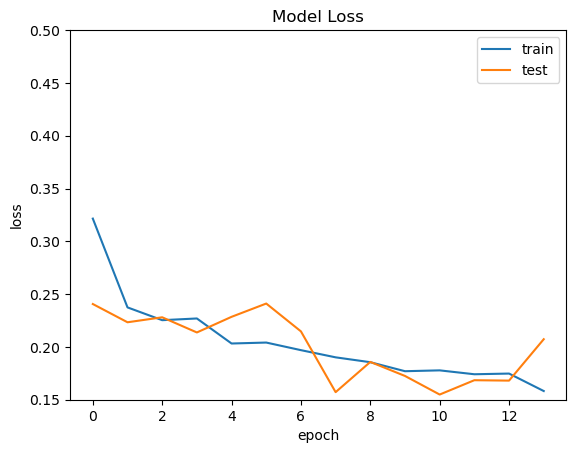

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylim([0.15, 0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

1/1 [==============================] - 0s 34ms/step


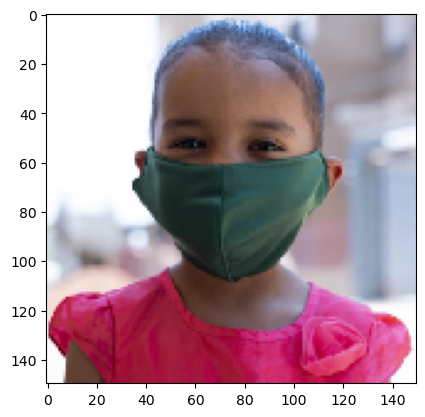

In [29]:

img = image.load_img("withMask.png",target_size=(150, 150))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)

In [30]:
print(output)

[[0.]]


In [31]:
model.save("maskDetection.h5")